Visualización del ajuste de boosted trees en regresion
===

* *30 min* | Última modificación: Julio 12, 2019.

Adaptado de https://www.tensorflow.org/tutorials/estimators/boosted_trees_model_understanding?hl=es

## Preparación

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.interpolate import griddata

## Datasets

In [3]:
##
## Datos para entrenamiento
##
npts = 5000
np.random.seed(0)

x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x*np.exp(-x**2 - y**2)

df = pd.DataFrame({
    'x': x, 
    'y': y, 
    'z': z,
})

NUM_EXAMPLES = len(z)

In [4]:
##
## Datos para pronóstico
##

xi = np.linspace(-2.0, 2.0, 200),
yi = np.linspace(-2.1, 2.1, 210),
xi, yi = np.meshgrid(xi, yi);

df_predict = pd.DataFrame({
    'x' : xi.flatten(),
    'y' : yi.flatten(),
})

predict_shape = xi.shape

## Graficación del contorno

In [5]:
def plot_contour(x, y, z, **kwargs):
    
    plt.figure(figsize=(10, 8))
    
    CS = plt.contour(
        x, 
        y, 
        z, 
        15, 
        linewidths=1.0, 
        colors='k')
    
    CS = plt.contourf(
        x, 
        y, 
        z, 
        15,
        cmap='RdBu_r')
    
    plt.colorbar()
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)

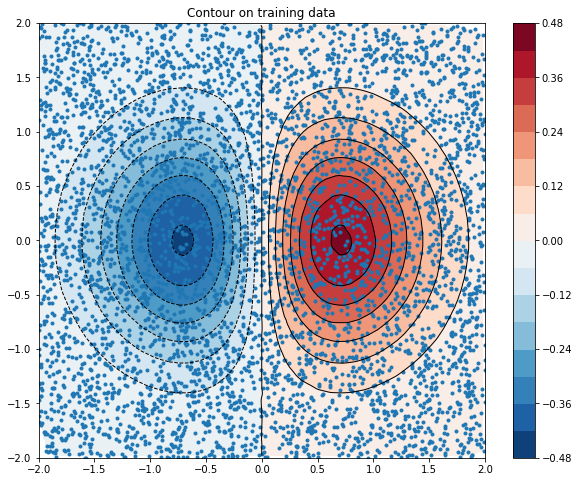

In [6]:
zi = griddata(
    df[['x', 'y']].values, 
    df.z, 
    (xi, yi), 
    method='linear')

plot_contour(xi, yi, zi)
plt.scatter(df.x, df.y, marker='.')
plt.title('Contour on training data');

## Regresión lineal

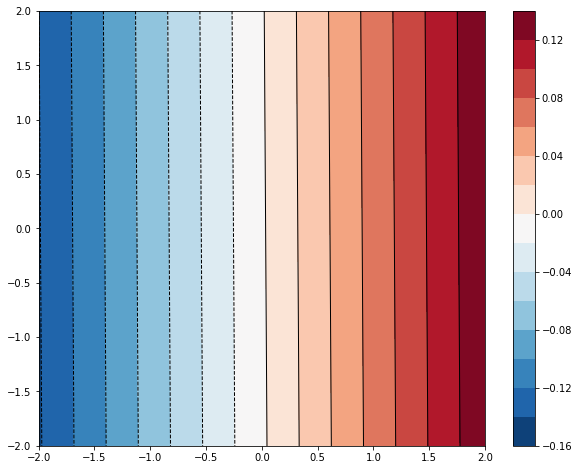

In [7]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression(
    fit_intercept=True, 
    normalize=False)

linearRegression.fit(
    df[['x', 'y']].values, 
    df.z)

plot_contour(
    xi, 
    yi, 
    linearRegression.predict(
        df_predict[['x', 'y']].values).reshape(predict_shape))

## Gradient Boosting Regressor

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

def create_gbt(n_estimators):

    gradientBoostingRegressor = GradientBoostingRegressor(
        loss='ls', 
        learning_rate=0.1, 
        n_estimators=n_estimators, 
        subsample=1.0, 
        criterion='friedman_mse', 
        min_samples_split=2, 
        min_samples_leaf=1, 
        min_weight_fraction_leaf=0.0, 
        max_depth=6, 
        min_impurity_decrease=0.0, 
        init=None, 
        random_state=12345, 
        max_features=None, 
        alpha=0.9, 
        verbose=0, 
        max_leaf_nodes=None, 
        warm_start=False, 
        presort='auto', 
        validation_fraction=0.1, 
        n_iter_no_change=None, 
        tol=0.0001)


    gradientBoostingRegressor.fit(
        df[['x', 'y']].values, 
        df.z)

    plot_contour(
        xi, 
        yi, 
        gradientBoostingRegressor.predict(
            df_predict[['x', 'y']].values).reshape(predict_shape))
    
    plt.text(-2.0, 2.1, '# trees: {}'.format(n_estimators), size=20);
    

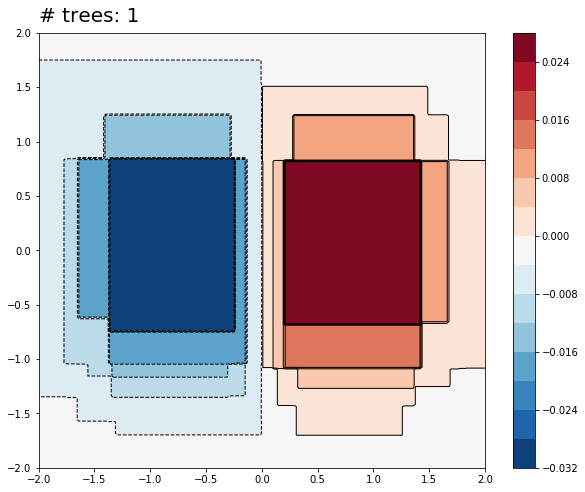

In [9]:
create_gbt(1)

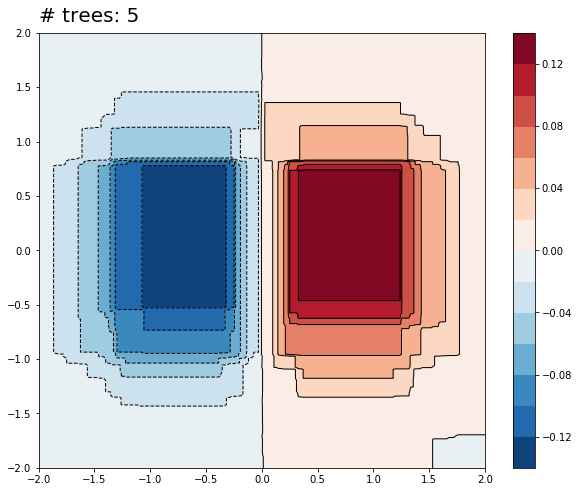

In [10]:
create_gbt(5)

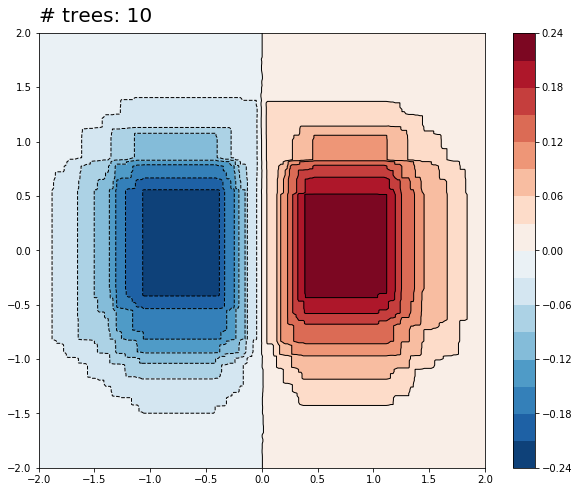

In [11]:
create_gbt(10)

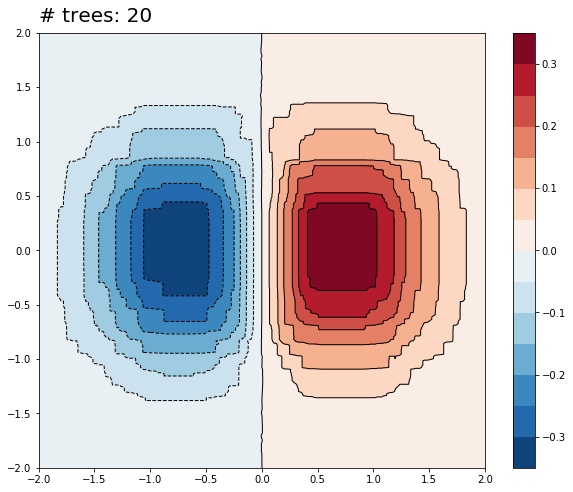

In [12]:
create_gbt(20)

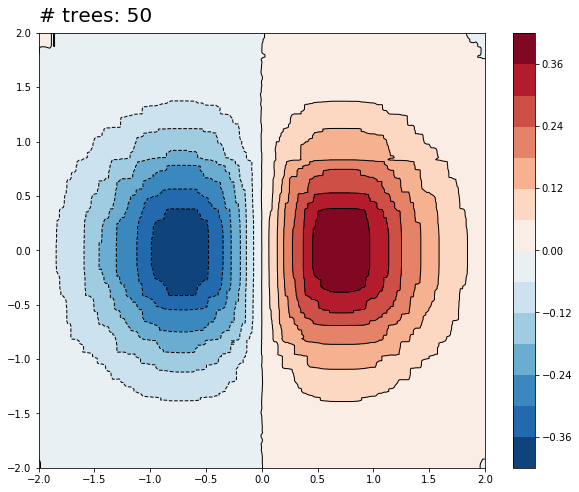

In [13]:
create_gbt(50)